In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import linregress

from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import mpltern

# Import Data

In [8]:
#People who live and work in their own municipality in AMP and walk
#dgporto_ = pd.DataFrame([dgporto['Local de residência à data dos Censos [2021] (NUTS - 2013)'].loc[i].split(":")[1] for i in dgporto.index],columns=["Concelho"])

#for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
#             "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
#             "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]:
#    dgporto_[mode] = list(dgporto[["S7A{year}:{year}-T:HM-T:Total-{mode}-2:Na freguesia onde reside atualmente".format(year=2011,mode=mode),
#                                "S7A{year}:{year}-T:HM-T:Total-{mode}-3:No mesmo município, noutra freguesia".format(year=2011,mode=mode)]].sum(axis=1))
#dgporto_

dg = pd.read_csv(r"ine_indicador_0011704_AMs.csv",sep=";")
dg.drop([0,18],axis=0,inplace=True)
#AMP
dAMP={}
for year in [2011,2021]:
    
    dAMP[year] = dg.loc[1:18][["Local de residência à data dos Censos [2021] (NUTS - 2013)"]+["S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode) for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]]]

    dAMP[year]=dAMP[year].rename({"Local de residência à data dos Censos [2021] (NUTS - 2013)":"Concelho"},axis=1)
    dAMP[year]=dAMP[year].rename({"S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode):mode.split(":")[1] for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]},axis=1)
    dAMP[year]["Total"] = list(dg.loc[1:18]["S7A2011:2011-T:HM-T:Total-T:Total-T:Total"])



dg = pd.read_csv(r"ine_indicador_0011704_AMs.csv",sep=";")
dg.drop([0,18],axis=0,inplace=True)
#AML
dAML={}
for year in [2011,2021]:
    
    dAML[year] = dg.loc[19:37][["Local de residência à data dos Censos [2021] (NUTS - 2013)"]+["S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode) for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]]]

    dAML[year]=dAML[year].rename({"Local de residência à data dos Censos [2021] (NUTS - 2013)":"Concelho"},axis=1)
    dAML[year]=dAML[year].rename({"S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode):mode.split(":")[1] for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]},axis=1)
    dAML[year]["Total"] = list(dg.loc[19:37]["S7A2011:2011-T:HM-T:Total-T:Total-T:Total"])

dg2 = pd.read_csv(r"ine_indicador_0011704_Norte.csv",sep=";")
#Norte
dNorte={}   
for year in [2011,2021]:
    dNorte[year] = dg2[["Local de residência à data dos Censos [2021] (NUTS - 2013)"]+["S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode) for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                     "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                     "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]]]
    dNorte[year]=dNorte[year].rename({"Local de residência à data dos Censos [2021] (NUTS - 2013)":"Concelho"},axis=1)
    dNorte[year]=dNorte[year].rename({"S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode):mode.split(":")[1] for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]},axis=1)
    dNorte[year]["Total"] = list(dg2["S7A2011:2011-T:HM-T:Total-T:Total-T:Total"])

dg2 = pd.read_csv(r"ine_indicador_0011704_Centro.csv",sep=";")
#Centro
dCentro={}   
for year in [2011,2021]:
    dCentro[year] = dg2[["Local de residência à data dos Censos [2021] (NUTS - 2013)"]+["S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode) for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                     "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                     "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]]]
    dCentro[year]=dCentro[year].rename({"Local de residência à data dos Censos [2021] (NUTS - 2013)":"Concelho"},axis=1)
    dCentro[year]=dCentro[year].rename({"S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode):mode.split(":")[1] for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]},axis=1)
    dCentro[year]["Total"] = list(dg2["S7A2011:2011-T:HM-T:Total-T:Total-T:Total"])

dg2 = pd.read_csv(r"ine_indicador_0011704_Sul.csv",sep=";")
#Sul
dSul={}   
for year in [2011,2021]:
    dSul[year] = dg2[["Local de residência à data dos Censos [2021] (NUTS - 2013)"]+["S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode) for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                     "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                     "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]]]
    dSul[year]=dSul[year].rename({"Local de residência à data dos Censos [2021] (NUTS - 2013)":"Concelho"},axis=1)
    dSul[year]=dSul[year].rename({"S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode):mode.split(":")[1] for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]},axis=1)
    dSul[year]["Total"] = list(dg2["S7A2011:2011-T:HM-T:Total-T:Total-T:Total"])

dg2 = pd.read_csv(r"ine_indicador_0011704_Ilhas.csv",sep=";")
#Ilhas
dIlhas={}   
for year in [2011,2021]:
    dIlhas[year] = dg2[["Local de residência à data dos Censos [2021] (NUTS - 2013)"]+["S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode) for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                     "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                     "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]]]
    dIlhas[year]=dIlhas[year].rename({"Local de residência à data dos Censos [2021] (NUTS - 2013)":"Concelho"},axis=1)
    dIlhas[year]=dIlhas[year].rename({"S7A{year}:{year}-T:HM-T:Total-{mode}-T:Total".format(year=year,mode=mode):mode.split(":")[1] for mode in ["01:A pé","02:Automovel ligeiro - como condutor","04:Autocarro",
                 "05:Transporte coletivo da empresa ou da escola","06:Metropolitano",
                 "07:Comboio","08:Motociclo","09:Bicicleta","10:Barco","11:Outro"]},axis=1)
    dIlhas[year]["Total"] = list(dg2["S7A2011:2011-T:HM-T:Total-T:Total-T:Total"])

# Ternary Plots

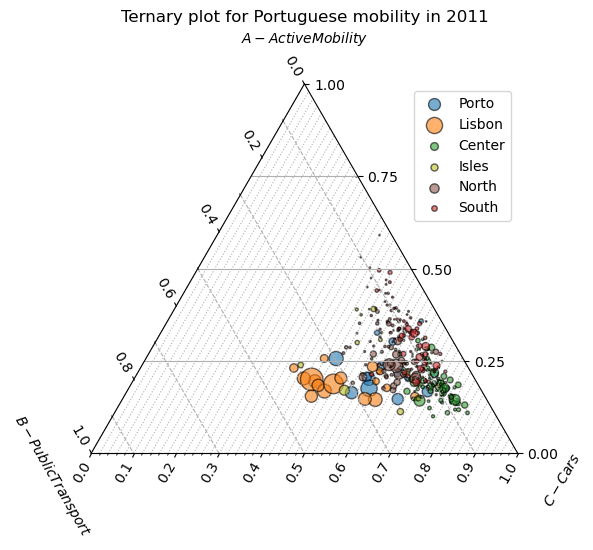

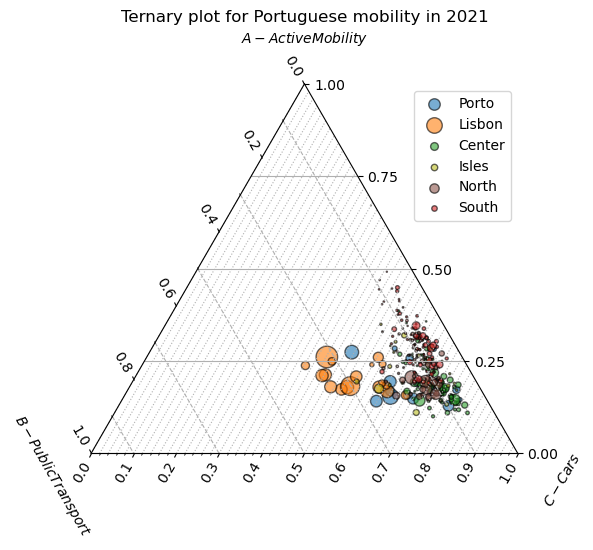

In [9]:
Acolumns = ["A pé","Bicicleta"]
Bcolumns = ["Autocarro","Metropolitano","Comboio","Barco"]
Ccolumns = ["Automovel ligeiro - como condutor","Motociclo"]

'''
colors = {"AMP":"tab:blue", "AML":"tab:orange","Remainder":"tab:green"}

dds = {2021:{"AMP":dAMP[2021],"AML":dAML[2021],"Remainder":pd.concat((dNorte[2021],dCentro[2021],dSul[2021],dIlhas[2021]))},
       2011:{"AMP":dAMP[2011],"AML":dAML[2011],"Remainder":pd.concat((dNorte[2011],dCentro[2011],dSul[2011],dIlhas[2011]))}}
'''

colors = {"Porto":"tab:blue", "Lisbon":"tab:orange","Center":"tab:green","Isles":"tab:olive","North":"tab:brown","South":"tab:red"}

dds = {2021:{"Porto":dAMP[2021],"Lisbon":dAML[2021],"Center":dCentro[2021],"Isles":dIlhas[2021],"North":dNorte[2021],"South":dSul[2021]},
       2011:{"Porto":dAMP[2011],"Lisbon":dAML[2011],"Center":dCentro[2021],"Isles":dIlhas[2011],"North":dNorte[2011],"South":dSul[2011]}}
#'''

for year in [2011,2021]:
    
    ax = pl.subplot(projection="ternary")
    
    for i in list(dds[year]):
        A=dds[year][i][Acolumns].sum(axis=1)
        B=dds[year][i][Bcolumns].sum(axis=1)
        C=dds[year][i][Ccolumns].sum(axis=1)

        T = A+B+C
    
        ax.scatter(A/T, B/T, C/T, s=T*1e-3, c=colors[i], edgecolors="k", alpha=0.6,label=i)

    ax.set_tlabel("$A - Active Mobility$")
    ax.set_llabel("$B - Public Transport$")
    ax.set_rlabel("$C - Cars$")
    
    ax.taxis.set_major_locator(MultipleLocator(0.25))
    ax.laxis.set_major_locator(MultipleLocator(0.20))
    ax.raxis.set_major_locator(MultipleLocator(0.10))
    
    ax.laxis.set_minor_locator(MultipleLocator(0.1))
    ax.raxis.set_minor_locator(AutoMinorLocator(5))
    
    ax.grid(axis='t')
    ax.grid(axis='l', which='minor', linestyle='--')
    ax.grid(axis='r', which='both', linestyle=':')
    pl.legend()
    
    pl.title("Ternary plot for Portuguese mobility in "+str(year))
    pl.savefig("Ternary"+str(year))
    pl.show()

In [46]:
A

1      1296
2      3421
3      9948
4      9153
5     14519
      ...  
25      464
26      842
27     2049
28      411
29      298
Length: 308, dtype: int64

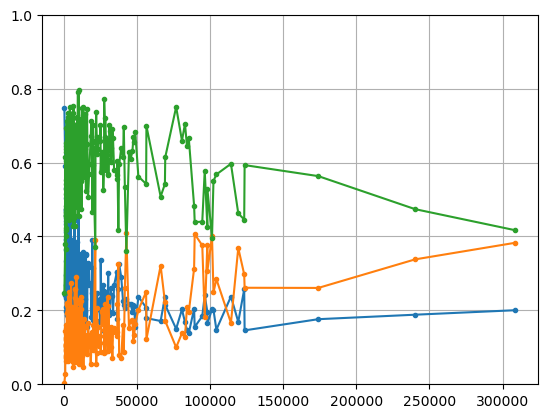

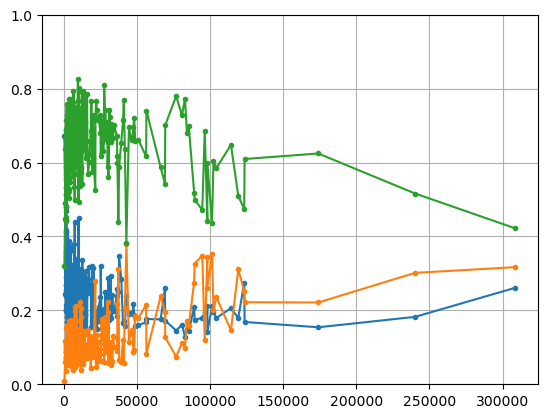

In [51]:
for year in [2011,2021]:

    df = pd.concat((dAMP[year],dAML[year],dNorte[year],dCentro[year],dSul[year],dIlhas[year]))
    df.sort_values("Total",inplace=True)
    
    A=df[Acolumns].sum(axis=1)
    B=df[Bcolumns].sum(axis=1)
    C=df[Ccolumns].sum(axis=1)
    T = A+B+C

    pl.plot(df["Total"],A/T,'.-')
    pl.plot(df["Total"],B/T,'.-')
    pl.plot(df["Total"],C/T,'.-')
    pl.ylim(0,1),pl.grid()
    pl.show()

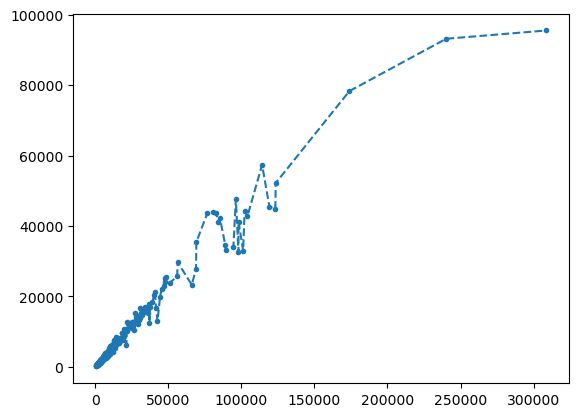

In [40]:
pl.plot(df["Total"],df["Automovel ligeiro - como condutor"],'.--')
pl.show()

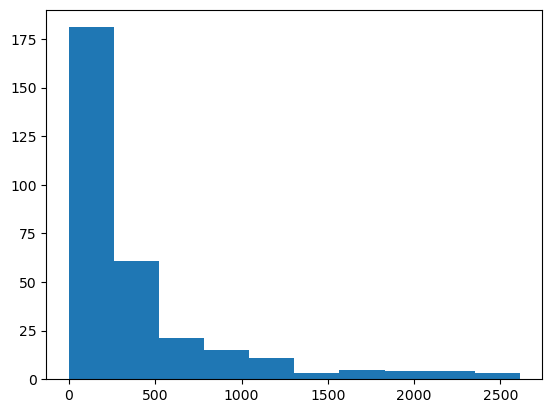

In [24]:
pl.hist(pd.concat((dAMP[2021],dAML[2021],dNorte[2021],dCentro[2021],dSul[2021],dIlhas[2021]))["Transporte coletivo da empresa ou da escola"])
pl.show()

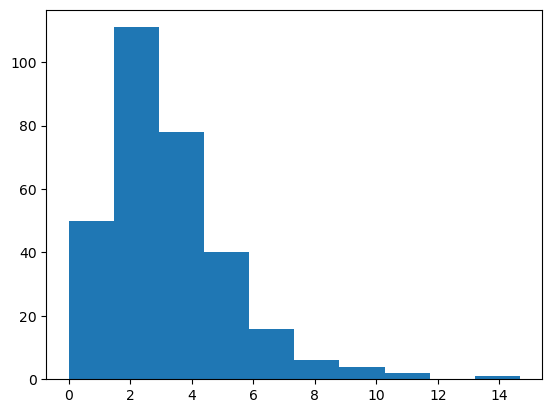

In [28]:
pl.hist(100*pd.concat((dAMP[2021],dAML[2021],dNorte[2021],dCentro[2021],dSul[2021],dIlhas[2021]))["Transporte coletivo da empresa ou da escola"]/pd.concat((dAMP[2021],dAML[2021],dNorte[2021],dCentro[2021],dSul[2021],dIlhas[2021]))["Total"])
pl.show()